# OpenCVを使って画像に対しての処理をしてみよう 

## 顔検出ができるプログラムを作成しよう

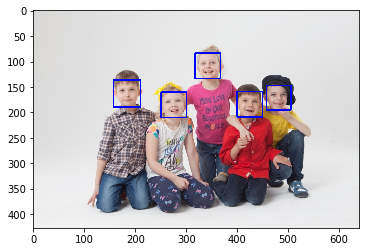

In [0]:
# ライブラリのインポート
import cv2
import matplotlib.pyplot as plt

# 画像を読み込み
image = cv2.imread("/content/drive/My Drive/Colab Notebooks/face.jpg")

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カスケードファイルを指定
cascade_file = "/content/drive/My Drive/Colab Notebooks/haarcascade_frontalface_alt.xml"

# カスケードファイルを読み込み
cascade = cv2.CascadeClassifier(cascade_file)

# 顔を認識し矩形にリスト化 例：[318, 84, 50, 50]
face_list = cascade.detectMultiScale(image)

# 顔を囲う枠の色を指定
color = (0, 0, 255)

# 顔が認識されたら実行
if len(face_list) > 0:
    for face in face_list:
        x, y, w, h = face
        cv2.rectangle(image, (x,y), (x+w, y+h), color, thickness=2)
else:
    print("顔が認識できませんでした。")

# ビジュアライズ
plt.imshow(image)
plt.show()

## 顔にモザイクをかけるプログラムを作成しよう

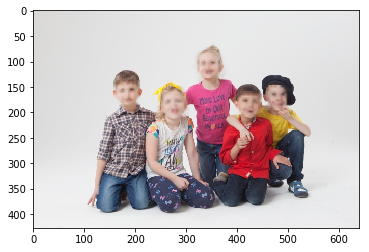

In [0]:
# ライブラリのインポート
import cv2
import matplotlib.pyplot as plt

# 画像を読み込み
image = cv2.imread("/content/drive/My Drive/Colab Notebooks/face.jpg")

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カスケードファイルを指定
cascade_file = "/content/drive/My Drive/Colab Notebooks/haarcascade_frontalface_alt.xml"

# カスケードファイルを読み込み
cascade = cv2.CascadeClassifier(cascade_file)

# 顔を認識し矩形にリスト化 例：[318, 84, 50, 50]
face_list = cascade.detectMultiScale(image)

# 顔が認識されたら実行
if len(face_list) > 0:
    for face in face_list:
        x, y, w, h = face
        #認識した顔を切り抜き
        face_img = image[y:y+h, x:x+w]
        # 切り抜いた画像をリサイズ
        face_img = cv2.resize(face_img, (w//4, h//4))
        # サイズを元に戻す
        face_img = cv2.resize(face_img, (w, h))
        # 元の画像に貼り付ける
        image[y:y+h, x:x+w] = face_img

else:
    print("顔が認識できませんでした。")

plt.imshow(image)
plt.show()

## 画像を反転しグレースケールにして保存してみよう

In [0]:
import cv2

# 画像を読み込み
image = cv2.imread("/content/drive/My Drive/Colab Notebooks/face.jpg")

# 画像を左右反転
image = cv2.flip(image,1)

# 画像をグレースケールに変換
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 画像を保存
cv2.imwrite("/content/drive/My Drive/Colab Notebooks/flip-face.jpg", image)

plt.imshow(image)
plt.gray()
plt.show()

True

## 画像のスムージングができるプログラムを作成しよう

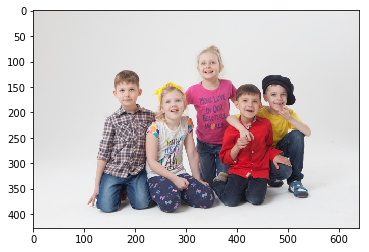

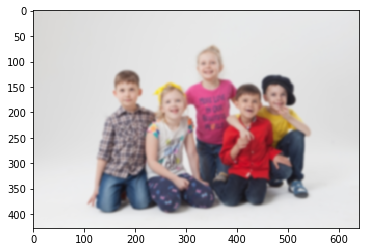

In [0]:
# 画像のスムージング

import cv2

# 画像を読み込み
image = cv2.imread("/content/drive/My Drive/Colab Notebooks/face.jpg")

# BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

# スムージング(ガウシアンフィルター)
def blur(img):
    filtered = cv2.GaussianBlur(img, (11, 11), 0)
    return filtered

img_gaussian = blur(image)

plt.imshow(img_gaussian)
plt.show()

## 輪郭を強調するプログラムを作成しよう

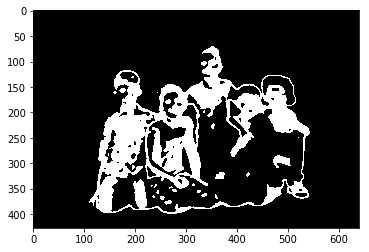

In [0]:
import numpy as np

# 輪郭強調
def binary_threshold(img):
    grayed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    under_thresh = 100
    upper_thresh = 180
    maxValue = 255
    th, drop_back = cv2.threshold(grayed, under_thresh, maxValue, cv2.THRESH_BINARY)
    th, clarify_born = cv2.threshold(grayed, upper_thresh, maxValue, cv2.THRESH_BINARY_INV)
    merged = np.minimum(drop_back, clarify_born)
    return merged

img_bin = binary_threshold(img_gaussian)

plt.imshow(img_bin)
plt.show()